In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

### DATA COLLECTION AND PROCESSING



In [62]:
#loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [63]:
#print(breast_cancer_dataset)

In [64]:
 data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [65]:
#data_frame.head()

In [66]:
data_frame['label'] = breast_cancer_dataset.target

In [67]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [68]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [69]:
#checking the missing values

data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [70]:
#statistical measures of data

data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [71]:
data_frame['label'].value_counts()

,count
label,
1,357
0,212


0 --> Benign

1 --> Malignant

In [72]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [73]:

#separating the features and target

X = data_frame.drop(columns = 'label', axis = 1)
Y = data_frame['label']


### Spliting the data into training and testing

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Standardize the data


In [75]:
from sklearn.preprocessing import StandardScaler


In [76]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Importing tensorflow and keras

In [77]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [78]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')   # ONE output neuron
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [80]:
# training the neural network

history = model.fit(X_train_std, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3901 - loss: 0.8109 - val_accuracy: 0.6522 - val_loss: 0.5560
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6740 - loss: 0.5478 - val_accuracy: 0.8696 - val_loss: 0.3784
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8357 - loss: 0.3970 - val_accuracy: 0.9783 - val_loss: 0.2822
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8968 - loss: 0.3103 - val_accuracy: 0.9783 - val_loss: 0.2282
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9166 - loss: 0.2577 - val_accuracy: 0.9783 - val_loss: 0.1944
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9369 - loss: 0.2226 - val_accuracy: 0.9565 - val_loss: 0.1716
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9516 - loss: 0.1975 - val_accuracy: 0.9565 - val_loss: 0.1555
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9568 - loss: 0.1785 - val_accuracy: 0.9783 - v

## VISUALIZING ACCURACY AND LOSS

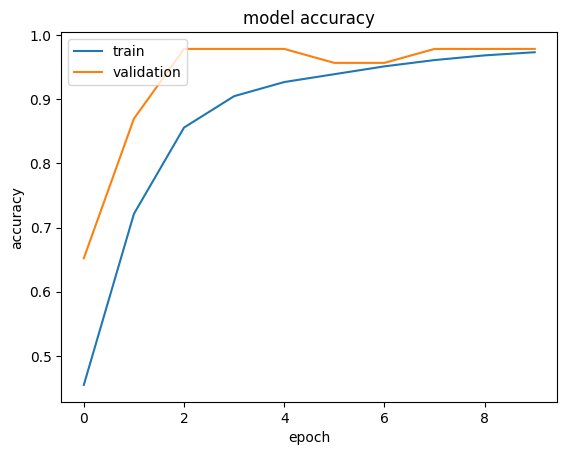

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

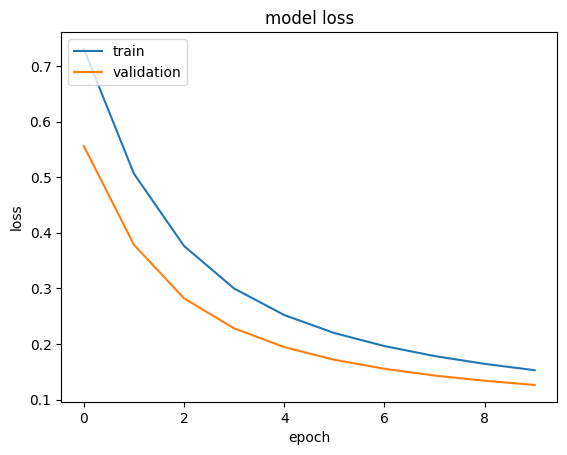

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Accuracy of the model on test data

In [83]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print('Test accuracy:', accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9728 - loss: 0.1284
Test accuracy: 0.9736841917037964


In [84]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


#### model.predict() gives the prediction probability of each class for that data point

In [85]:
# ARGMAX FUNCTION
my_list = [10, 20, 30]

index_of_max = np.argmax(my_list)
print(index_of_max)

2


In [86]:
# converting the prediction probability for class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]


## PREDICTIVE MODEL

In [87]:
# To make a prediction with your own data, define input_data as a numpy array with 30 values.
# Example: input_data = np.array([17.99, 10.38, ..., 0.11890])
# For demonstration, we'll continue using the first row of X:
user_input_string = "8510653,B,13.08,15.71,85.63,520,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183"
input_data = np.array([float(x) for x in user_input_string.split(',')[2:]])

#change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standarizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

# Since the model is binary classification with sigmoid output, the prediction is a single probability.
# We can classify based on a threshold (e.g., 0.5).
# If the model output is for multiple classes, np.argmax would be appropriate.
# Given the current model's output (single neuron with sigmoid), we interpret it directly.

# Assuming sigmoid output, > 0.5 is one class, <= 0.5 is the other.
# For consistency with previous usage of argmax (though less relevant for binary sigmoid output directly), we can adapt.
# If your model was designed for 2 outputs with softmax, then argmax would be standard.
# For a single sigmoid output, a simple thresholding is used:
if prediction[0][0] > 0.5:
  prediction_label = 1 # Malignant
else:
  prediction_label = 0 # Benign

print(prediction_label)

if(prediction_label == 0):
  print('The breast cancer is Malignant')
else:
  print('The breast cancer is Benign')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
[[0.90272325]]
1
The breast cancer is Benign
